# Installing Required Packages and Libraries

In [1]:
# ! pip install plotly
# ! pip install cufflinks
# ! pip install xgboost

In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import numpy as np
import math
from math import sqrt

In [3]:
first_df = pd.read_csv("1st Innings T20.csv")
second_df = pd.read_csv("2nd Innings T20.csv")

In [4]:
first_df

,Unnamed: 0,matchId,balls,runs,tossWinner,battingTeam,bowlingTeam,player_out,city,venue
0,0,5_1,0.1,0,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
1,1,5_1,0.2,0,India,West Indies,India,1,Lauderhill,Central Broward Regional Park Stadium Turf Ground
2,2,5_1,0.3,0,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
3,3,5_1,0.4,1,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
4,4,5_1,0.5,0,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
...,...,...,...,...,...,...,...,...,...,...
91959,118,1795_1,19.2,1,New Zealand,Pakistan,New Zealand,0,Auckland,Eden Park
91960,119,1795_1,19.3,0,New Zealand,Pakistan,New Zealand,1,Auckland,Eden Park
91961,120,1795_1,19.4,2,New Zealand,Pakistan,New Zealand,0,Auckland,Eden Park
91962,121,1795_1,19.5,1,New Zealand,Pakistan,New Zealand,0,Auckland,Eden Park


In [5]:
second_df

,Unnamed: 0,matchId,balls,runs,tossWinner,battingTeam,bowlingTeam,player_out,city,venue
0,0,5_2,0.1,0,India,India,West Indies,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
1,1,5_2,0.2,0,India,India,West Indies,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
2,2,5_2,0.3,1,India,India,West Indies,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
3,3,5_2,0.4,1,India,India,West Indies,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
4,4,5_2,0.5,0,India,India,West Indies,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
...,...,...,...,...,...,...,...,...,...,...
83315,111,1795_2,18.1,0,New Zealand,New Zealand,Pakistan,0,Auckland,Eden Park
83316,112,1795_2,18.2,2,New Zealand,New Zealand,Pakistan,0,Auckland,Eden Park
83317,113,1795_2,18.3,0,New Zealand,New Zealand,Pakistan,0,Auckland,Eden Park
83318,114,1795_2,18.4,0,New Zealand,New Zealand,Pakistan,0,Auckland,Eden Park


# Data Cleaning and Preparation

In [6]:
df1=first_df.columns.to_list()
df1.remove('venue')
df2=second_df.columns.to_list()
df2.remove('venue')

In [7]:
df1

['Unnamed: 0',
 'matchId',
 'balls',
 'runs',
 'tossWinner',
 'battingTeam',
 'bowlingTeam',
 'player_out',
 'city']

In [8]:
df2

['Unnamed: 0',
 'matchId',
 'balls',
 'runs',
 'tossWinner',
 'battingTeam',
 'bowlingTeam',
 'player_out',
 'city']

In [9]:
first_df=first_df[df1]
first_df['innings']=1

In [10]:
second_df=second_df[df2]
second_df['innings']=2

In [11]:
first_df

,Unnamed: 0,matchId,balls,runs,tossWinner,battingTeam,bowlingTeam,player_out,city,innings
0,0,5_1,0.1,0,India,West Indies,India,0,Lauderhill,1
1,1,5_1,0.2,0,India,West Indies,India,1,Lauderhill,1
2,2,5_1,0.3,0,India,West Indies,India,0,Lauderhill,1
3,3,5_1,0.4,1,India,West Indies,India,0,Lauderhill,1
4,4,5_1,0.5,0,India,West Indies,India,0,Lauderhill,1
...,...,...,...,...,...,...,...,...,...,...
91959,118,1795_1,19.2,1,New Zealand,Pakistan,New Zealand,0,Auckland,1
91960,119,1795_1,19.3,0,New Zealand,Pakistan,New Zealand,1,Auckland,1
91961,120,1795_1,19.4,2,New Zealand,Pakistan,New Zealand,0,Auckland,1
91962,121,1795_1,19.5,1,New Zealand,Pakistan,New Zealand,0,Auckland,1


In [12]:
second_df

,Unnamed: 0,matchId,balls,runs,tossWinner,battingTeam,bowlingTeam,player_out,city,innings
0,0,5_2,0.1,0,India,India,West Indies,0,Lauderhill,2
1,1,5_2,0.2,0,India,India,West Indies,0,Lauderhill,2
2,2,5_2,0.3,1,India,India,West Indies,0,Lauderhill,2
3,3,5_2,0.4,1,India,India,West Indies,0,Lauderhill,2
4,4,5_2,0.5,0,India,India,West Indies,0,Lauderhill,2
...,...,...,...,...,...,...,...,...,...,...
83315,111,1795_2,18.1,0,New Zealand,New Zealand,Pakistan,0,Auckland,2
83316,112,1795_2,18.2,2,New Zealand,New Zealand,Pakistan,0,Auckland,2
83317,113,1795_2,18.3,0,New Zealand,New Zealand,Pakistan,0,Auckland,2
83318,114,1795_2,18.4,0,New Zealand,New Zealand,Pakistan,0,Auckland,2


# Concatenating Both Dataframe as one

In [13]:
merged_df = pd.concat([first_df, second_df])
merged_df

,Unnamed: 0,matchId,balls,runs,tossWinner,battingTeam,bowlingTeam,player_out,city,innings
0,0,5_1,0.1,0,India,West Indies,India,0,Lauderhill,1
1,1,5_1,0.2,0,India,West Indies,India,1,Lauderhill,1
2,2,5_1,0.3,0,India,West Indies,India,0,Lauderhill,1
3,3,5_1,0.4,1,India,West Indies,India,0,Lauderhill,1
4,4,5_1,0.5,0,India,West Indies,India,0,Lauderhill,1
...,...,...,...,...,...,...,...,...,...,...
83315,111,1795_2,18.1,0,New Zealand,New Zealand,Pakistan,0,Auckland,2
83316,112,1795_2,18.2,2,New Zealand,New Zealand,Pakistan,0,Auckland,2
83317,113,1795_2,18.3,0,New Zealand,New Zealand,Pakistan,0,Auckland,2
83318,114,1795_2,18.4,0,New Zealand,New Zealand,Pakistan,0,Auckland,2


In [14]:
merged_df=merged_df.drop(columns=['tossWinner'],axis=1)

# Splitting Overs and balls 

# Calculating how many deliveries (balls) are left at that Instant

In [15]:
merged_df['Overs'] = merged_df['balls'].apply(lambda x:str(x).split(".")[0])

In [16]:
merged_df['ball_In_Over'] = merged_df['balls'].apply(lambda x:str(x).split(".")[1])

In [17]:
merged_df['deliveries'] = merged_df['Overs'].astype('int')*6 + merged_df['ball_In_Over'].astype('int')

In [18]:
merged_df['delivery_left']=120-merged_df['deliveries']
merged_df

,Unnamed: 0,matchId,balls,runs,battingTeam,bowlingTeam,player_out,city,innings,Overs,ball_In_Over,deliveries,delivery_left
0,0,5_1,0.1,0,West Indies,India,0,Lauderhill,1,0,1,1,119
1,1,5_1,0.2,0,West Indies,India,1,Lauderhill,1,0,2,2,118
2,2,5_1,0.3,0,West Indies,India,0,Lauderhill,1,0,3,3,117
3,3,5_1,0.4,1,West Indies,India,0,Lauderhill,1,0,4,4,116
4,4,5_1,0.5,0,West Indies,India,0,Lauderhill,1,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83315,111,1795_2,18.1,0,New Zealand,Pakistan,0,Auckland,2,18,1,109,11
83316,112,1795_2,18.2,2,New Zealand,Pakistan,0,Auckland,2,18,2,110,10
83317,113,1795_2,18.3,0,New Zealand,Pakistan,0,Auckland,2,18,3,111,9
83318,114,1795_2,18.4,0,New Zealand,Pakistan,0,Auckland,2,18,4,112,8


In [19]:
merged_df.delivery_left.unique()

array([119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107,
       106, 105, 104, 103, 102, 101, 100,  99,  98,  97,  96,  95,  94,
        93,  92,  91,  90,  89,  88,  87,  86,  85,  84,  83,  82,  81,
        80,  79,  78,  77,  76,  75,  74,  73,  72,  71,  70,  69,  68,
        67,  66,  65,  64,  63,  62,  61,  60,  59,  58,  57,  56,  55,
        54,  53,  52,  51,  50,  49,  48,  47,  46,  45,  44,  43,  42,
        41,  40,  39,  38,  37,  36,  35,  34,  33,  32,  31,  30,  29,
        28,  27,  26,  25,  24,  23,  22,  21,  20,  19,  18,  17,  16,
        15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,   3,
         2,   1,   0,  -1,  -2,  -3])

In [20]:
def f1(x):
    if x<0:
        return 0
    else:
        return x

def f2(x):
    if int(x)<6:
        return 1
    else:
        return 0

In [21]:
#since delivery left cannot be negative
merged_df['PowerPlay']=merged_df['Overs'].apply(lambda x:f2(x))
merged_df['Delivery_left']=merged_df['delivery_left'].apply(lambda x:f1(x))

In [22]:
#drop over and ball 

merged_df=merged_df.drop(columns=['Overs','ball_In_Over','balls'],axis=1)

# Now we will focus on runs , do cleaning and make it meaningful
# Producing Ball by ball score

In [23]:
merged_df['score'] = merged_df.groupby('matchId').cumsum()['runs']

In [24]:
merged_df

,Unnamed: 0,matchId,runs,battingTeam,bowlingTeam,player_out,city,innings,deliveries,delivery_left,PowerPlay,Delivery_left,score
0,0,5_1,0,West Indies,India,0,Lauderhill,1,1,119,1,119,0
1,1,5_1,0,West Indies,India,1,Lauderhill,1,2,118,1,118,0
2,2,5_1,0,West Indies,India,0,Lauderhill,1,3,117,1,117,0
3,3,5_1,1,West Indies,India,0,Lauderhill,1,4,116,1,116,1
4,4,5_1,0,West Indies,India,0,Lauderhill,1,5,115,1,115,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83315,111,1795_2,0,New Zealand,Pakistan,0,Auckland,2,109,11,0,11,148
83316,112,1795_2,2,New Zealand,Pakistan,0,Auckland,2,110,10,0,10,150
83317,113,1795_2,0,New Zealand,Pakistan,0,Auckland,2,111,9,0,9,150
83318,114,1795_2,0,New Zealand,Pakistan,0,Auckland,2,112,8,0,8,150


In [25]:
# Calculating runrate

merged_df['CurrentRunRate']=(merged_df['score'])/(merged_df['deliveries']/6)

In [26]:
merged_df.head()

,Unnamed: 0,matchId,runs,battingTeam,bowlingTeam,player_out,city,innings,deliveries,delivery_left,PowerPlay,Delivery_left,score,CurrentRunRate
0,0,5_1,0,West Indies,India,0,Lauderhill,1,1,119,1,119,0,0.0
1,1,5_1,0,West Indies,India,1,Lauderhill,1,2,118,1,118,0,0.0
2,2,5_1,0,West Indies,India,0,Lauderhill,1,3,117,1,117,0,0.0
3,3,5_1,1,West Indies,India,0,Lauderhill,1,4,116,1,116,1,1.5
4,4,5_1,0,West Indies,India,0,Lauderhill,1,5,115,1,115,1,1.2


In [27]:
merged_df.tail()

,Unnamed: 0,matchId,runs,battingTeam,bowlingTeam,player_out,city,innings,deliveries,delivery_left,PowerPlay,Delivery_left,score,CurrentRunRate
83315,111,1795_2,0,New Zealand,Pakistan,0,Auckland,2,109,11,0,11,148,8.146789
83316,112,1795_2,2,New Zealand,Pakistan,0,Auckland,2,110,10,0,10,150,8.181818
83317,113,1795_2,0,New Zealand,Pakistan,0,Auckland,2,111,9,0,9,150,8.108108
83318,114,1795_2,0,New Zealand,Pakistan,0,Auckland,2,112,8,0,8,150,8.035714
83319,115,1795_2,6,New Zealand,Pakistan,0,Auckland,2,113,7,0,7,156,8.283186


In [28]:
# Calculating final score

finalScore=merged_df.groupby('matchId').sum()['runs']

In [29]:
finalScore=finalScore.rename("Final_Score")

# Finally we will see the wickets left and fallen

In [30]:
merged_df['wickets'] = merged_df.groupby('matchId').cumsum()['player_out']

In [31]:
merged_df.head(3)

,Unnamed: 0,matchId,runs,battingTeam,bowlingTeam,player_out,city,innings,deliveries,delivery_left,PowerPlay,Delivery_left,score,CurrentRunRate,wickets
0,0,5_1,0,West Indies,India,0,Lauderhill,1,1,119,1,119,0,0.0,0
1,1,5_1,0,West Indies,India,1,Lauderhill,1,2,118,1,118,0,0.0,1
2,2,5_1,0,West Indies,India,0,Lauderhill,1,3,117,1,117,0,0.0,1


In [32]:
merged_df['wicketsLeft'] = 10 - merged_df['wickets']

In [33]:
groups = merged_df.groupby('matchId')

In [34]:
#calculating runs in last 5 overs 

l5 = []
for ids in merged_df['matchId'].unique():
    l5.extend(groups.get_group(ids).rolling(window=30).sum()['runs'].values.tolist())
merged_df['Run_In_Last5'] = l5

In [35]:
#calculating wickets in last 5 overs

l5w = []
for ids in merged_df['matchId'].unique():
    l5w.extend(groups.get_group(ids).rolling(window=30).sum()['player_out'].values.tolist())
merged_df['Wickets_In_Last5'] = l5w

In [36]:
merged_df

,Unnamed: 0,matchId,runs,battingTeam,bowlingTeam,player_out,city,innings,deliveries,delivery_left,PowerPlay,Delivery_left,score,CurrentRunRate,wickets,wicketsLeft,Run_In_Last5,Wickets_In_Last5
0,0,5_1,0,West Indies,India,0,Lauderhill,1,1,119,1,119,0,0.000000,0,10,NaN,NaN
1,1,5_1,0,West Indies,India,1,Lauderhill,1,2,118,1,118,0,0.000000,1,9,NaN,NaN
2,2,5_1,0,West Indies,India,0,Lauderhill,1,3,117,1,117,0,0.000000,1,9,NaN,NaN
3,3,5_1,1,West Indies,India,0,Lauderhill,1,4,116,1,116,1,1.500000,1,9,NaN,NaN
4,4,5_1,0,West Indies,India,0,Lauderhill,1,5,115,1,115,1,1.200000,1,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83315,111,1795_2,0,New Zealand,Pakistan,0,Auckland,2,109,11,0,11,148,8.146789,5,5,45.0,2.0
83316,112,1795_2,2,New Zealand,Pakistan,0,Auckland,2,110,10,0,10,150,8.181818,5,5,46.0,2.0
83317,113,1795_2,0,New Zealand,Pakistan,0,Auckland,2,111,9,0,9,150,8.108108,5,5,42.0,2.0
83318,114,1795_2,0,New Zealand,Pakistan,0,Auckland,2,112,8,0,8,150,8.035714,5,5,41.0,2.0


In [37]:
merged_df[merged_df.matchId=='5_1'].iloc[10:15,]

,Unnamed: 0,matchId,runs,battingTeam,bowlingTeam,player_out,city,innings,deliveries,delivery_left,PowerPlay,Delivery_left,score,CurrentRunRate,wickets,wicketsLeft,Run_In_Last5,Wickets_In_Last5
10,10,5_1,0,West Indies,India,0,Lauderhill,1,10,110,1,110,7,4.200000,1,9,NaN,NaN
11,11,5_1,1,West Indies,India,0,Lauderhill,1,11,109,1,109,8,4.363636,1,9,NaN,NaN
12,12,5_1,0,West Indies,India,0,Lauderhill,1,12,108,1,108,8,4.000000,1,9,NaN,NaN
13,13,5_1,0,West Indies,India,1,Lauderhill,1,13,107,1,107,8,3.692308,2,8,NaN,NaN
14,14,5_1,4,West Indies,India,0,Lauderhill,1,13,107,1,107,12,5.538462,2,8,NaN,NaN


In [38]:
merged_df['Wickets_In_Last5']=merged_df['Wickets_In_Last5'].combine_first(merged_df['wickets'])
merged_df['Run_In_Last5']=merged_df['Run_In_Last5'].combine_first(merged_df['score'])

In [39]:
merged_df[merged_df.matchId=='5_1'].iloc[10:15,]

,Unnamed: 0,matchId,runs,battingTeam,bowlingTeam,player_out,city,innings,deliveries,delivery_left,PowerPlay,Delivery_left,score,CurrentRunRate,wickets,wicketsLeft,Run_In_Last5,Wickets_In_Last5
10,10,5_1,0,West Indies,India,0,Lauderhill,1,10,110,1,110,7,4.200000,1,9,7.0,1.0
11,11,5_1,1,West Indies,India,0,Lauderhill,1,11,109,1,109,8,4.363636,1,9,8.0,1.0
12,12,5_1,0,West Indies,India,0,Lauderhill,1,12,108,1,108,8,4.000000,1,9,8.0,1.0
13,13,5_1,0,West Indies,India,1,Lauderhill,1,13,107,1,107,8,3.692308,2,8,8.0,2.0
14,14,5_1,4,West Indies,India,0,Lauderhill,1,13,107,1,107,12,5.538462,2,8,12.0,2.0


In [40]:
merged_df

,Unnamed: 0,matchId,runs,battingTeam,bowlingTeam,player_out,city,innings,deliveries,delivery_left,PowerPlay,Delivery_left,score,CurrentRunRate,wickets,wicketsLeft,Run_In_Last5,Wickets_In_Last5
0,0,5_1,0,West Indies,India,0,Lauderhill,1,1,119,1,119,0,0.000000,0,10,0.0,0.0
1,1,5_1,0,West Indies,India,1,Lauderhill,1,2,118,1,118,0,0.000000,1,9,0.0,1.0
2,2,5_1,0,West Indies,India,0,Lauderhill,1,3,117,1,117,0,0.000000,1,9,0.0,1.0
3,3,5_1,1,West Indies,India,0,Lauderhill,1,4,116,1,116,1,1.500000,1,9,1.0,1.0
4,4,5_1,0,West Indies,India,0,Lauderhill,1,5,115,1,115,1,1.200000,1,9,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83315,111,1795_2,0,New Zealand,Pakistan,0,Auckland,2,109,11,0,11,148,8.146789,5,5,45.0,2.0
83316,112,1795_2,2,New Zealand,Pakistan,0,Auckland,2,110,10,0,10,150,8.181818,5,5,46.0,2.0
83317,113,1795_2,0,New Zealand,Pakistan,0,Auckland,2,111,9,0,9,150,8.108108,5,5,42.0,2.0
83318,114,1795_2,0,New Zealand,Pakistan,0,Auckland,2,112,8,0,8,150,8.035714,5,5,41.0,2.0


In [41]:
merged_df=merged_df.merge(finalScore,on='matchId')

In [42]:
merged_df.city.value_counts().sum()

175284

In [43]:
f=pd.DataFrame(merged_df.groupby(['matchId','innings','city'])[['matchId','innings','city','Final_Score']].agg({'Final_Score':'max'}))

In [44]:
f=f.reset_index()

In [45]:
f

,matchId,innings,city,Final_Score
0,1000_1,1,Colombo,133
1,1000_2,2,Colombo,136
2,1001_1,1,Brisbane,191
3,1001_2,2,Brisbane,164
4,1004_1,1,Johannesburg,126
...,...,...,...,...
1506,998_2,2,Johannesburg,168
1507,99_1,1,Mirpur,147
1508,99_2,2,Mirpur,124
1509,9_1,1,Bangalore,202


In [46]:
g=pd.DataFrame(f.groupby(['innings','city'])[['innings','city','Final_Score']].mean()['Final_Score'])

In [47]:
g=g.reset_index()

In [48]:
g.columns=['innings','city','AverageScore']

In [49]:
g

,innings,city,AverageScore
0,1,Abu Dhabi,146.416667
1,1,Adelaide,181.800000
2,1,Ahmedabad,174.166667
3,1,Al Amarat,174.500000
4,1,Antigua,136.000000
...,...,...,...
206,2,Thiruvananthapuram,117.000000
207,2,Trinidad,123.166667
208,2,Victoria,176.000000
209,2,Visakhapatnam,105.500000


In [50]:
merged_df=merged_df.merge(g,on=['innings','city'])

In [51]:
merged_df

,Unnamed: 0,matchId,runs,battingTeam,bowlingTeam,player_out,city,innings,deliveries,delivery_left,PowerPlay,Delivery_left,score,CurrentRunRate,wickets,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,AverageScore
0,0,5_1,0,West Indies,India,0,Lauderhill,1,1,119,1,119,0,0.000000,0,10,0.0,0.0,95,159.2
1,1,5_1,0,West Indies,India,1,Lauderhill,1,2,118,1,118,0,0.000000,1,9,0.0,1.0,95,159.2
2,2,5_1,0,West Indies,India,0,Lauderhill,1,3,117,1,117,0,0.000000,1,9,0.0,1.0,95,159.2
3,3,5_1,1,West Indies,India,0,Lauderhill,1,4,116,1,116,1,1.500000,1,9,1.0,1.0,95,159.2
4,4,5_1,0,West Indies,India,0,Lauderhill,1,5,115,1,115,1,1.200000,1,9,1.0,1.0,95,159.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175279,117,1710_2,1,Netherlands,Afghanistan,0,Edinburgh,2,114,6,0,6,126,6.631579,9,1,28.0,4.0,130,130.0
175280,118,1710_2,0,Netherlands,Afghanistan,0,Edinburgh,2,115,5,0,5,126,6.573913,9,1,27.0,4.0,130,130.0
175281,119,1710_2,0,Netherlands,Afghanistan,0,Edinburgh,2,116,4,0,4,126,6.517241,9,1,23.0,4.0,130,130.0
175282,120,1710_2,4,Netherlands,Afghanistan,0,Edinburgh,2,117,3,0,3,130,6.666667,9,1,26.0,4.0,130,130.0


# Checking Null values

In [52]:
merged_df.isnull().sum()

Unnamed: 0          0
matchId             0
runs                0
battingTeam         0
bowlingTeam         0
player_out          0
city                0
innings             0
deliveries          0
delivery_left       0
PowerPlay           0
Delivery_left       0
score               0
CurrentRunRate      0
wickets             0
wicketsLeft         0
Run_In_Last5        0
Wickets_In_Last5    0
Final_Score         0
AverageScore        0
dtype: int64

In [53]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175284 entries, 0 to 175283
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        175284 non-null  int64  
 1   matchId           175284 non-null  object 
 2   runs              175284 non-null  int64  
 3   battingTeam       175284 non-null  object 
 4   bowlingTeam       175284 non-null  object 
 5   player_out        175284 non-null  int64  
 6   city              175284 non-null  object 
 7   innings           175284 non-null  int64  
 8   deliveries        175284 non-null  int64  
 9   delivery_left     175284 non-null  int64  
 10  PowerPlay         175284 non-null  int64  
 11  Delivery_left     175284 non-null  int64  
 12  score             175284 non-null  int64  
 13  CurrentRunRate    175284 non-null  float64
 14  wickets           175284 non-null  int64  
 15  wicketsLeft       175284 non-null  int64  
 16  Run_In_Last5      17

In [54]:
# Shuffling the dataframe 

from sklearn.utils import shuffle
merged_df=shuffle(merged_df)

In [55]:
merged_df

,Unnamed: 0,matchId,runs,battingTeam,bowlingTeam,player_out,city,innings,deliveries,delivery_left,PowerPlay,Delivery_left,score,CurrentRunRate,wickets,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,AverageScore
76807,122,1453_1,6,Afghanistan,Ireland,0,Greater Noida,1,119,1,0,1,178,8.974790,4,6,66.0,2.0,184,180.000000
86646,70,600_1,1,Sri Lanka,India,0,Visakhapatnam,1,68,52,0,52,56,4.941176,7,3,23.0,2.0,82,104.000000
144139,73,1346_2,2,India,Australia,0,Sydney,2,72,48,0,48,105,8.750000,2,8,40.0,1.0,195,141.923077
148148,101,192_2,0,Afghanistan,South Africa,0,Barbados,2,92,28,0,28,76,4.956522,9,1,33.0,1.0,80,132.176471
112939,9,1301_2,0,Pakistan,Zimbabwe,0,Harare,2,10,110,1,110,14,8.400000,0,10,14.0,0.0,163,138.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31325,101,1374_1,0,West Indies,Sri Lanka,0,Colombo,1,96,24,0,24,134,8.375000,4,6,44.0,1.0,162,153.142857
61752,9,204_1,0,Australia,India,0,Barbados,1,10,110,1,110,5,3.000000,0,10,5.0,0.0,184,153.882353
138735,10,99_2,0,Sri Lanka,Bangladesh,0,Mirpur,2,11,109,1,109,8,4.363636,0,10,8.0,0.0,124,130.344828
91559,89,1499_1,1,India,Australia,0,Guwahati,1,89,31,0,31,80,5.393258,7,3,20.0,2.0,118,118.000000


# Saving the final dataframe as CSV in the active directory

In [56]:
merged_df.drop(['matchId','runs','delivery_left', 'player_out','deliveries','wickets'], axis=1, inplace=True)
merged_df

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,battingTeam,bowlingTeam,city,innings,PowerPlay,Delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,AverageScore
76807,122,Afghanistan,Ireland,Greater Noida,1,0,1,178,8.974790,6,66.0,2.0,184,180.000000
86646,70,Sri Lanka,India,Visakhapatnam,1,0,52,56,4.941176,3,23.0,2.0,82,104.000000
144139,73,India,Australia,Sydney,2,0,48,105,8.750000,8,40.0,1.0,195,141.923077
148148,101,Afghanistan,South Africa,Barbados,2,0,28,76,4.956522,1,33.0,1.0,80,132.176471
112939,9,Pakistan,Zimbabwe,Harare,2,1,110,14,8.400000,10,14.0,0.0,163,138.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31325,101,West Indies,Sri Lanka,Colombo,1,0,24,134,8.375000,6,44.0,1.0,162,153.142857
61752,9,Australia,India,Barbados,1,1,110,5,3.000000,10,5.0,0.0,184,153.882353
138735,10,Sri Lanka,Bangladesh,Mirpur,2,1,109,8,4.363636,10,8.0,0.0,124,130.344828
91559,89,India,Australia,Guwahati,1,0,31,80,5.393258,3,20.0,2.0,118,118.000000


In [57]:
merged_df.to_csv('T20 International Dataset2.csv')

# Reading the Final Dataframe for analysis

In [58]:
wc_df = pd.read_csv(r"T20 International Dataset2.csv")

In [59]:
wc_df

,Unnamed: 0,Unnamed: 0.1,battingTeam,bowlingTeam,city,innings,PowerPlay,Delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,AverageScore
0,76807,122,Afghanistan,Ireland,Greater Noida,1,0,1,178,8.974790,6,66.0,2.0,184,180.000000
1,86646,70,Sri Lanka,India,Visakhapatnam,1,0,52,56,4.941176,3,23.0,2.0,82,104.000000
2,144139,73,India,Australia,Sydney,2,0,48,105,8.750000,8,40.0,1.0,195,141.923077
3,148148,101,Afghanistan,South Africa,Barbados,2,0,28,76,4.956522,1,33.0,1.0,80,132.176471
4,112939,9,Pakistan,Zimbabwe,Harare,2,1,110,14,8.400000,10,14.0,0.0,163,138.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175279,31325,101,West Indies,Sri Lanka,Colombo,1,0,24,134,8.375000,6,44.0,1.0,162,153.142857
175280,61752,9,Australia,India,Barbados,1,1,110,5,3.000000,10,5.0,0.0,184,153.882353
175281,138735,10,Sri Lanka,Bangladesh,Mirpur,2,1,109,8,4.363636,10,8.0,0.0,124,130.344828
175282,91559,89,India,Australia,Guwahati,1,0,31,80,5.393258,3,20.0,2.0,118,118.000000


# Exploratory data Analysis (EDA)

In [60]:
wc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175284 entries, 0 to 175283
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        175284 non-null  int64  
 1   Unnamed: 0.1      175284 non-null  int64  
 2   battingTeam       175284 non-null  object 
 3   bowlingTeam       175284 non-null  object 
 4   city              175284 non-null  object 
 5   innings           175284 non-null  int64  
 6   PowerPlay         175284 non-null  int64  
 7   Delivery_left     175284 non-null  int64  
 8   score             175284 non-null  int64  
 9   CurrentRunRate    175284 non-null  float64
 10  wicketsLeft       175284 non-null  int64  
 11  Run_In_Last5      175284 non-null  float64
 12  Wickets_In_Last5  175284 non-null  float64
 13  Final_Score       175284 non-null  int64  
 14  AverageScore      175284 non-null  float64
dtypes: float64(4), int64(8), object(3)
memory usage: 20.1+ MB


In [61]:
wc_df.describe()

,Unnamed: 0,Unnamed: 0.1,innings,PowerPlay,Delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,AverageScore
count,175284.00000,175284.000000,175284.000000,175284.000000,175284.000000,175284.000000,175284.000000,175284.000000,175284.000000,175284.000000,175284.000000,175284.000000
mean,87641.50000,58.912633,1.475343,0.321301,62.039393,72.739166,7.313388,7.336848,32.610563,1.259893,151.490958,148.948627
std,50600.27663,35.075234,0.499393,0.466978,33.928877,47.594067,2.367514,2.218057,14.731843,1.135783,33.650034,18.421754
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,57.666667
25%,43820.75000,29.000000,1.000000,0.000000,33.000000,33.000000,6.000000,6.000000,24.000000,0.000000,131.000000,138.000000
50%,87641.50000,58.000000,1.000000,0.000000,63.000000,68.000000,7.285714,8.000000,33.000000,1.000000,150.000000,148.916667
75%,131462.25000,88.000000,2.000000,1.000000,91.000000,107.000000,8.619961,9.000000,42.000000,2.000000,173.000000,160.833333
max,175283.00000,136.000000,2.000000,1.000000,119.000000,278.000000,84.000000,10.000000,90.000000,8.000000,278.000000,219.000000


In [62]:
#wc_df = wc_df.drop(['Unnamed: 0.1'], axis = 1 , inplace = True)

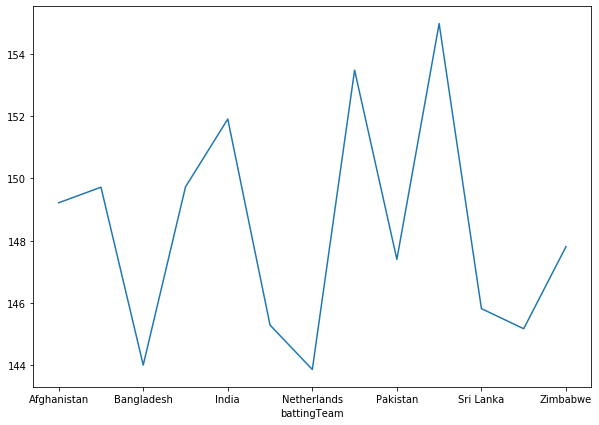

In [63]:
wc_df.groupby("battingTeam")['AverageScore'].mean().plot(figsize=(10,7))

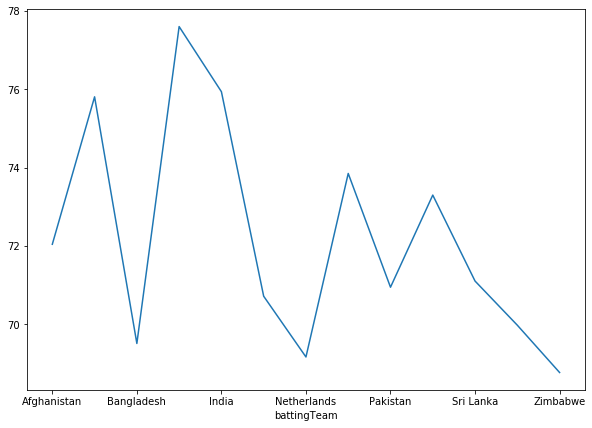

In [64]:
wc_df.groupby("battingTeam")['score'].mean().plot(figsize=(10,7))

In [65]:
wc_df.corr()

,Unnamed: 0,Unnamed: 0.1,innings,PowerPlay,Delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,AverageScore
Unnamed: 0,1.000000,-0.048902,0.864972,0.026778,0.050354,-0.040115,0.027543,-0.020259,-0.019923,0.032428,-0.167171,-0.349177
Unnamed: 0.1,-0.048902,1.000000,-0.055108,-0.798258,-0.998837,0.926429,0.162913,-0.763490,0.552348,0.384695,0.094039,0.055178
innings,0.864972,-0.055108,1.000000,0.029483,0.057249,-0.061738,-0.000393,-0.019408,-0.043464,0.029026,-0.229695,-0.461536
PowerPlay,0.026778,-0.798258,0.029483,1.000000,0.799060,-0.727293,-0.132550,0.581609,-0.514389,-0.302685,-0.059295,-0.034526
Delivery_left,0.050354,-0.998837,0.057249,0.799060,1.000000,-0.923616,-0.156038,0.763333,-0.550319,-0.384728,-0.089620,-0.054085
score,-0.040115,0.926429,-0.061738,-0.727293,-0.923616,1.000000,0.408631,-0.600650,0.701495,0.294173,0.327225,0.163286
CurrentRunRate,0.027543,0.162913,-0.000393,-0.132550,-0.156038,0.408631,1.000000,0.073281,0.611475,-0.072597,0.468069,0.213935
wicketsLeft,-0.020259,-0.763490,-0.019408,0.581609,0.763333,-0.600650,0.073281,1.000000,-0.217581,-0.698590,0.192881,0.066089
Run_In_Last5,-0.019923,0.552348,-0.043464,-0.514389,-0.550319,0.701495,0.611475,-0.217581,1.000000,0.055437,0.394595,0.187963
Wickets_In_Last5,0.032428,0.384695,0.029026,-0.302685,-0.384728,0.294173,-0.072597,-0.698590,0.055437,1.000000,-0.189535,-0.067446


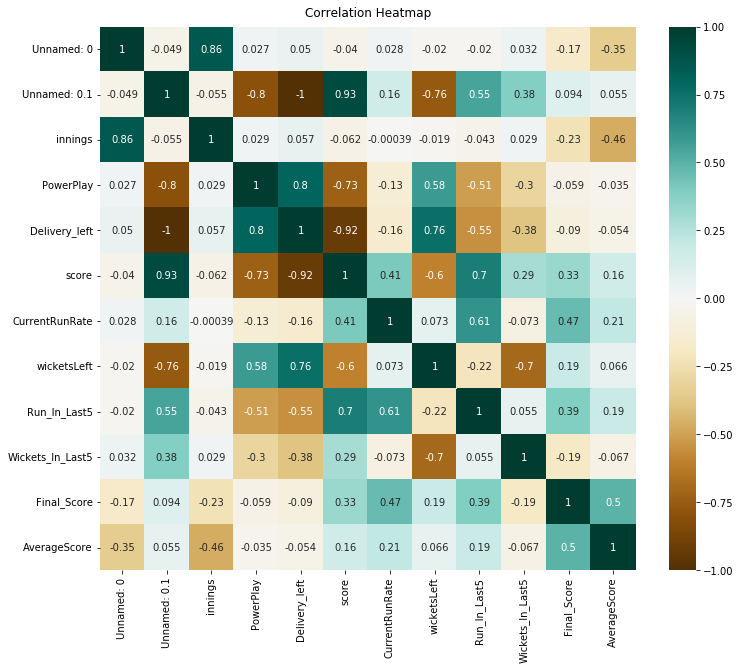

In [66]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(wc_df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=10);
#sns.heatmap(vis_df.corr());

In [67]:
t20i_df = wc_df.drop(columns=['PowerPlay', 'Wickets_In_Last5', 'Unnamed: 0','Unnamed: 0.1','innings','Delivery_left'])
t20i_df

,battingTeam,bowlingTeam,city,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Final_Score,AverageScore
0,Afghanistan,Ireland,Greater Noida,178,8.974790,6,66.0,184,180.000000
1,Sri Lanka,India,Visakhapatnam,56,4.941176,3,23.0,82,104.000000
2,India,Australia,Sydney,105,8.750000,8,40.0,195,141.923077
3,Afghanistan,South Africa,Barbados,76,4.956522,1,33.0,80,132.176471
4,Pakistan,Zimbabwe,Harare,14,8.400000,10,14.0,163,138.071429
...,...,...,...,...,...,...,...,...,...
175279,West Indies,Sri Lanka,Colombo,134,8.375000,6,44.0,162,153.142857
175280,Australia,India,Barbados,5,3.000000,10,5.0,184,153.882353
175281,Sri Lanka,Bangladesh,Mirpur,8,4.363636,10,8.0,124,130.344828
175282,India,Australia,Guwahati,80,5.393258,3,20.0,118,118.000000


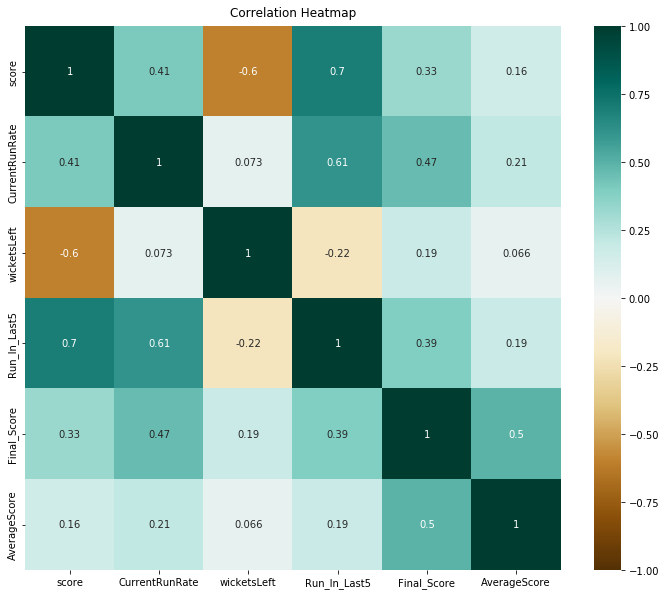

In [68]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(t20i_df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=10);

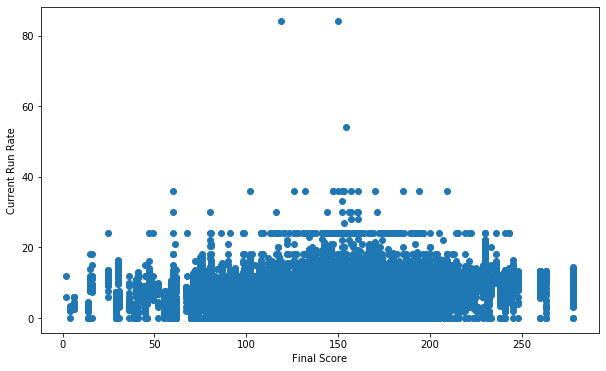

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = t20i_df['Final_Score'], y = t20i_df['CurrentRunRate'])
plt.xlabel("Final Score")
plt.ylabel("Current Run Rate")
plt.show()

# Data Modelling and Analysis 
# Performing Regression 

In [70]:
X = t20i_df.iloc[:,[3,4,5,6,8]].values #Input features
y = t20i_df.iloc[:, 7].values #Label

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

y_pred = lin.predict(X_test)
# # preds = xg_reg.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("RMSE: %f" % (rmse))
# # score = lin.score(X_test,y_test)*100
# # print("R-squared value:" , score)

In [75]:
lin.score(X_test,y_test)

0.48929309034697155

In [76]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [77]:
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

Custom accuracy: 63.852947217087696


In [78]:
t20i_df[1234:]

,battingTeam,bowlingTeam,city,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Final_Score,AverageScore
1234,Zimbabwe,Pakistan,Rawalpindi,15,6.428571,9,15.0,134,139.666667
1235,India,New Zealand,Hamilton,130,9.750000,7,49.0,208,162.583333
1236,New Zealand,Pakistan,Pallekele,28,6.222222,10,28.0,164,147.117647
1237,Pakistan,Zimbabwe,Harare,135,6.806723,4,37.0,136,157.214286
1238,Bangladesh,Zimbabwe,Khulna,65,7.959184,5,47.0,162,152.250000
...,...,...,...,...,...,...,...,...,...
175279,West Indies,Sri Lanka,Colombo,134,8.375000,6,44.0,162,153.142857
175280,Australia,India,Barbados,5,3.000000,10,5.0,184,153.882353
175281,Sri Lanka,Bangladesh,Mirpur,8,4.363636,10,8.0,124,130.344828
175282,India,Australia,Guwahati,80,5.393258,3,20.0,118,118.000000


In [79]:
new_prediction = lin.predict(sc.transform(np.array([[98,7.350000,8,39.0,128.395349]])))
print("Prediction score:" , new_prediction)

Prediction score: [150.52317762]


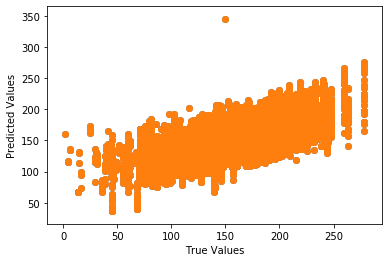

In [80]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
Linearregression_scatter = plt.scatter(y_test,y_pred)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



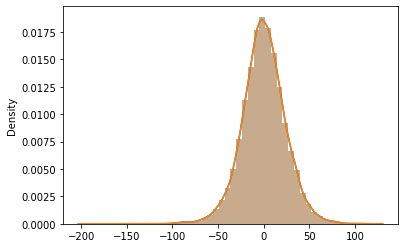

In [81]:
sns.distplot((y_test-y_pred),bins=50)
ytest_ypred = sns.distplot((y_test-y_pred),bins=50)

# Performing Random Forest Regressor

In [82]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor(n_estimators=100,max_features=None)
ran.fit(X_train,y_train)

RandomForestRegressor(max_features=None)

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

y_pred = ran.predict(X_test)
#preds = xg_reg.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("RMSE: %f" % (rmse))
# # score = lin.score(X_test,y_test)*100
# # print("R-squared value:" , score)

In [84]:
ran.score(X_test,y_test)

0.7914406156050635

In [85]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [86]:
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

Custom accuracy: 87.82775381666325


In [87]:
t20i_df[1234:]

,battingTeam,bowlingTeam,city,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Final_Score,AverageScore
1234,Zimbabwe,Pakistan,Rawalpindi,15,6.428571,9,15.0,134,139.666667
1235,India,New Zealand,Hamilton,130,9.750000,7,49.0,208,162.583333
1236,New Zealand,Pakistan,Pallekele,28,6.222222,10,28.0,164,147.117647
1237,Pakistan,Zimbabwe,Harare,135,6.806723,4,37.0,136,157.214286
1238,Bangladesh,Zimbabwe,Khulna,65,7.959184,5,47.0,162,152.250000
...,...,...,...,...,...,...,...,...,...
175279,West Indies,Sri Lanka,Colombo,134,8.375000,6,44.0,162,153.142857
175280,Australia,India,Barbados,5,3.000000,10,5.0,184,153.882353
175281,Sri Lanka,Bangladesh,Mirpur,8,4.363636,10,8.0,124,130.344828
175282,India,Australia,Guwahati,80,5.393258,3,20.0,118,118.000000


In [88]:
new_prediction_1 = ran.predict(sc.transform(np.array([[98,7.350000,8,39.0,128.395349]])))
print("Prediction score:" , new_prediction_1)

Prediction score: [143.48]


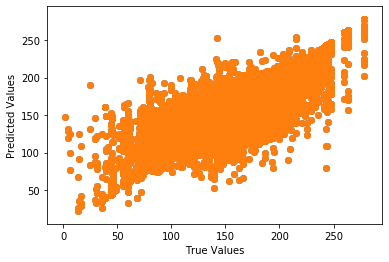

In [89]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
Linearregression_scatter = plt.scatter(y_test,y_pred)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



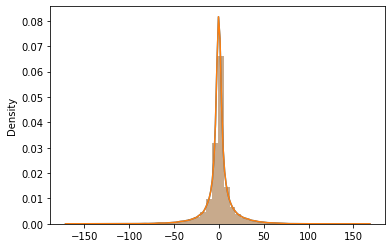

In [90]:
sns.distplot((y_test-y_pred),bins=50)
ytest_ypred = sns.distplot((y_test-y_pred),bins=50)

In [93]:
print('-- -- '*10)
print('-- -- '*10)
print('ACTUAL SCORE: 144')
print('-- -- '*10)
print('-- -- '*10)
print('Linear Regression score: ',lin.score(X_test,y_test))
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))
print("Prediction score:" , new_prediction)
print('-- -- '*10)
print('-- -- '*10)
print('Randoim Forest Regressor score: ',ran.score(X_test,y_test))
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))
print("Prediction score:" , new_prediction_1)
print('-- -- '*10)
print('-- -- '*10)

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
ACTUAL SCORE: 144
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
Linear Regression score:  0.48929309034697155
Custom accuracy: 87.82775381666325
Prediction score: [150.52317762]
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
Randoim Forest Regressor score:  0.7914406156050635
Custom accuracy: 87.82775381666325
Prediction score: [143.48]
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
